# ACM Research coding challenge (Spring 2023)

## Star dataset to predict star types
Link to dataset: https://www.kaggle.com/datasets/deepu1109/star-dataset?resource=download

## Reading in data

In [168]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [169]:
# Reading in .csv file
data = pd.read_csv('/Users/Owner/Desktop/projects/ACM-Research_CodingChallenge/6classcsv.csv')

In [170]:
# Printing first few lines + dimensions
print("Dimensions of dataset: ", data.shape)
print(data.head())

Dimensions of dataset:  (240, 7)
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


## Exploring the Data

In [171]:
# checking for any NULLs
data.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

### Statistics of dataset (Star type, temperature, luminosity)

In [172]:
data[["Star type", "Temperature (K)", "Luminosity(L/Lo)"]].describe()

,Star type,Temperature (K),Luminosity(L/Lo)
count,240.000000,240.000000,240.000000
mean,2.500000,10497.462500,107188.361635
std,1.711394,9552.425037,179432.244940
min,0.000000,1939.000000,0.000080
25%,1.000000,3344.250000,0.000865
50%,2.500000,5776.000000,0.070500
75%,4.000000,15055.500000,198050.000000
max,5.000000,40000.000000,849420.000000


### What is the most common star type?

In [173]:
print(data['Star type'].value_counts())

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64


We can see by checking the frequency of each star type in the dataset, there is an equal number of each type, therefore there is not a single common star type within the data.

### Graph Visualization
1. Comparing the mean radius of each star type
2. Comparing the mean temperature of each star type
3. Comparing the mean luminosity of each star type

In [174]:
from sklearn import datasets

<AxesSubplot:xlabel='Star type', ylabel='Radius(R/Ro)'>

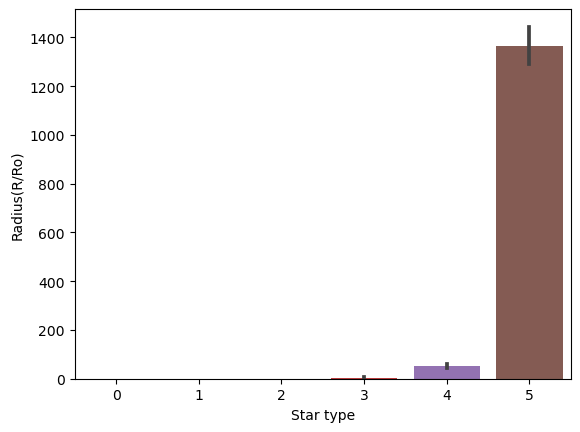

In [175]:
# 1.
sb.barplot(data=data, x="Star type", y="Radius(R/Ro)")

From this graph, we see that the hypergiant star has a mean radius that is 1300+ R/Ro larger than every other star type.

<AxesSubplot:xlabel='Star type', ylabel='Temperature (K)'>

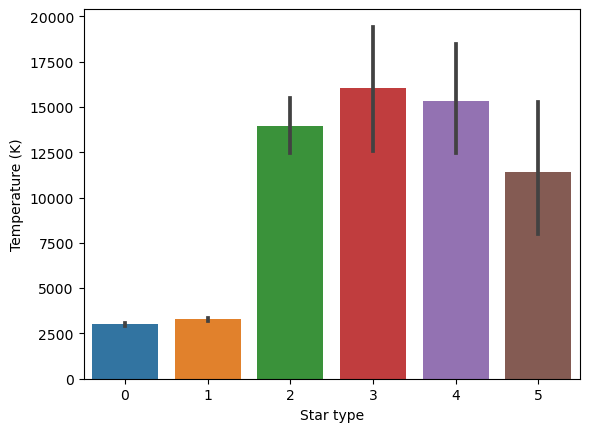

In [176]:
# 2. 
sb.barplot(data=data, x="Star type", y="Temperature (K)")

This graph shows that the main-sequence star type has a higher average temperature than all the dwarf and giant stars. 

<AxesSubplot:xlabel='Star type', ylabel='Luminosity(L/Lo)'>

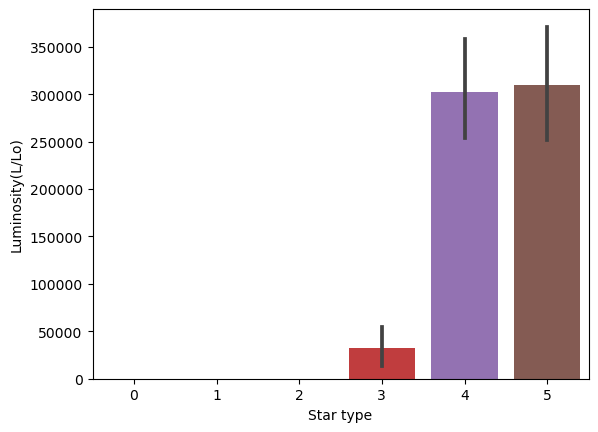

In [177]:
# 3. 
sb.barplot(data=data, x="Star type", y="Luminosity(L/Lo)")

This graph shows that the mean luminosity of the giant and main-sequence stars are incredibly large compared to the dwarf stars. The giant stars are 250000+ L/Lo larger than that of the main sequence stars' average luminosity.

## Training Logistic Regression Model with the data
Logistic Regression (binary classification)
- The target variable we will observe is the star type, with temperature and luminosity as factors.
- This model will predict between what are considered dwarf stars vs main-sequence + giant stars.

### Modifying columns
We must first modify the columns. 1 = dwarf, 0 = giant/main-sequence. 

In [178]:
# create a new column
data['star_type'] = np.where(data['Star type'] < 3, 1, 0)

# make 'star_type' data type = category
data.star_type = data.star_type.astype('category').cat.codes

# delete all extra columns
del data['Radius(R/Ro)']
del data['Absolute magnitude(Mv)']
del data['Star color']
del data['Star type']
del data['Spectral Class']

In [179]:
# print first few lines
print(data.head(25))

    Temperature (K)  Luminosity(L/Lo)  star_type
0              3068          0.002400          1
1              3042          0.000500          1
2              2600          0.000300          1
3              2800          0.000200          1
4              1939          0.000138          1
5              2840          0.000650          1
6              2637          0.000730          1
7              2600          0.000400          1
8              2650          0.000690          1
9              2700          0.000180          1
10             3600          0.002900          1
11             3129          0.012200          1
12             3134          0.000400          1
13             3628          0.005500          1
14             2650          0.000600          1
15             3340          0.003800          1
16             2799          0.001800          1
17             3692          0.003670          1
18             3192          0.003620          1
19             3441 

In [180]:
# 80/20 train test split
from sklearn.model_selection import train_test_split
 
x = data.loc[:, ['Luminosity(L/Lo)','Temperature (K)']]
y = data['star_type']

# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# output dimensions of train and test dataframes
print("Train size: ", x_train.shape)
print("Test size: ", x_test.shape)

Train size:  (192, 2)
Test size:  (48, 2)


### Training data

In [181]:
# training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

# testing
pred = clf.predict(x_test)

# evaluation
print(classification_report(y_test, pred, target_names=None))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.91      1.00      0.95        21

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



Logistic regression model has an accuracy score of 0.96.
This indicates that a logistic regression model is highly suitable to perform accurate predictions of star types (determining if the star is a dwarf star or not) using the factors of temperature and luminosity. We could train more models, like a simple RNN or CNN. Since the logistic regression model has proven to be almost 100% accurate, it's likely the neural networks may be less accurate at predicting dwarf stars.